In [6]:
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from RegscorePy import *
from collections import OrderedDict
from radial_distribution_funcs import *
import os
# import pymc3 as pm

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 200
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### match v9 and cosmos2020

In [10]:
cat_cosmos2020 = Table.read('COSMOS2020_CLASSIC_LP_params.fits')

In [12]:
combined_cat_name = 'COSMOS2020_v9_added_oct.fits'
cmd = 'java -jar stilts.jar tmatch2 in1=COSMOS2020_CLASSIC_LP_params.fits in2=clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="RA DEC" out='+combined_cat_name
os.system(cmd)
print(cmd)

java -jar stilts.jar tmatch2 in1=COSMOS2020_CLASSIC_LP_params.fits in2=clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="RA DEC" out=COSMOS2020_v9_added_oct.fits


### load and check v9 and cosmos2020 combined catalog

In [30]:
cat_cosmos_v9_added = Table.read('COSMOS2020_v9_added_oct.fits')
cat_cosmos_v9_added = cat_cosmos_v9_added[cat_cosmos_v9_added['MASK'] == 0]  # unmasked
cat_cosmos_v9_added = cat_cosmos_v9_added[cat_cosmos_v9_added['OBJ_TYPE'] == 0]  # galaxies

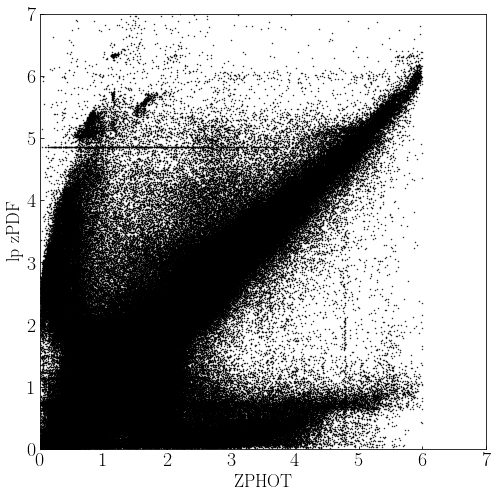

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(8,8))
plt.scatter(cat_cosmos_v9_added['ZPHOT'],cat_cosmos_v9_added['lp_zPDF'],s=0.2,color='k')
plt.xlabel('ZPHOT',fontsize=18)
plt.ylabel('lp zPDF',fontsize=18)
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

### mass uncertainty

In [38]:
# consistent z
cat_cons_z = cat_cosmos_v9_added[(cat_cosmos_v9_added['ZPHOT']-cat_cosmos_v9_added['lp_zPDF'])/cat_cosmos_v9_added['ZPHOT']<0.1]

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


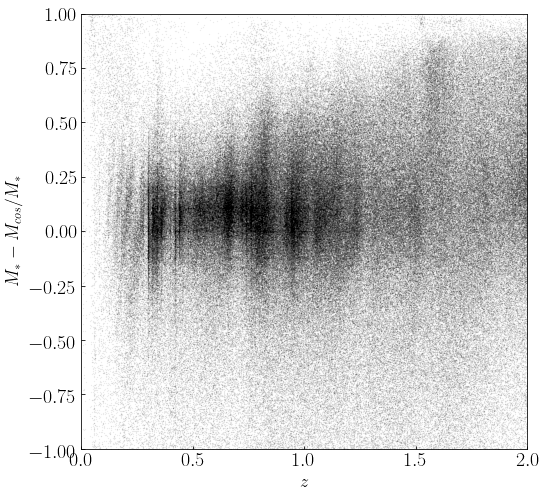

In [42]:
fig, axs = plt.subplots(1, 1, figsize=(8,8))
mass_relaive_diff = (10**(cat_cons_z['MASS_MED']-7) - 10**(cat_cons_z['lp_mass_med']-7))/10**(cat_cons_z['MASS_MED']-7)

plt.scatter(cat_cons_z['ZPHOT'],mass_relaive_diff,s=0.1,color='k',alpha=0.1)
plt.xlabel('$z$',fontsize=18)
plt.ylabel('$M_*-M_{cosmos}/M_*$',fontsize=18)
plt.xlim([0,2])
plt.ylim([-1,1])
plt.show()

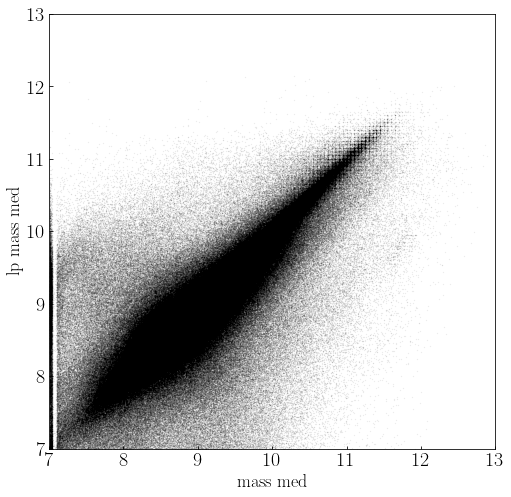

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(8,8))
plt.scatter(cat_cosmos_v9_added['MASS_MED'],cat_cosmos_v9_added['lp_mass_med'],s=0.1,color='k',alpha=0.1)
plt.xlabel('mass med',fontsize=18)
plt.ylabel('lp mass med',fontsize=18)
plt.xlim([7,13])
plt.ylim([7,13])
plt.show()